In [43]:
import pandas as pd
import numpy as np

In [44]:
train_path="D:\\intern\\codsoftintern\\Genre Classification Dataset\\train_data.txt"
train_data=pd.read_csv(train_path,header=None,sep=" ::: ",names=['ID','Title','Genres','Description'],engine="python")
train_data.head()

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [45]:
train_data.isnull().sum()

ID             0
Title          0
Genres         0
Description    0
dtype: int64

In [46]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [47]:
train_data['Genres'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [48]:
train_data.groupby(['Genres']).count()

,ID,Title,Description
Genres,,,
action,1315,1315,1315
adult,590,590,590
adventure,775,775,775
animation,498,498,498
biography,265,265,265
comedy,7447,7447,7447
crime,505,505,505
documentary,13096,13096,13096
drama,13613,13613,13613


In [49]:
train_data['Genres'].count()

54214

In [50]:
# train_data['Year']=train_data['Title'].str.extract(r'\((\d{4})\)')
# train_data.head()

In [51]:
# train_data['Title']=train_data['Title'].str.replace(r'\((\d{4})\)','').str.strip()
# train_data.head()

In [52]:
# lim=train_data.iloc[:,0:4]
# train_data['Year'] = train_data['Year'].astype(str)
# years=train_data['Year'].unique()
# min_year = min(map(int, years))
# max_year = max(map(int, years))

# # Generate year ranges
# year_ranges = [(str(year), str(year + 4)) for year in range(min_year, max_year, 5)]


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_data.info()
# #train_data['Year']=train_data['Year'].astype('int')
# train_data.isnull().sum()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'drama'),
  Text(1, 0, 'documentary'),
  Text(2, 0, 'comedy'),
  Text(3, 0, 'short'),
  Text(4, 0, 'horror'),
  Text(5, 0, 'thriller'),
  Text(6, 0, 'action'),
  Text(7, 0, 'western'),
  Text(8, 0, 'reality-tv'),
  Text(9, 0, 'family'),
  Text(10, 0, 'adventure'),
  Text(11, 0, 'music'),
  Text(12, 0, 'romance'),
  Text(13, 0, 'sci-fi'),
  Text(14, 0, 'adult'),
  Text(15, 0, 'crime'),
  Text(16, 0, 'animation'),
  Text(17, 0, 'sport'),
  Text(18, 0, 'talk-show'),
  Text(19, 0, 'fantasy'),
  Text(20, 0, 'mystery'),
  Text(21, 0, 'musical'),
  Text(22, 0, 'biography'),
  Text(23, 0, 'history'),
  Text(24, 0, 'game-show'),
  Text(25, 0, 'news'),
  Text(26, 0, 'war')])

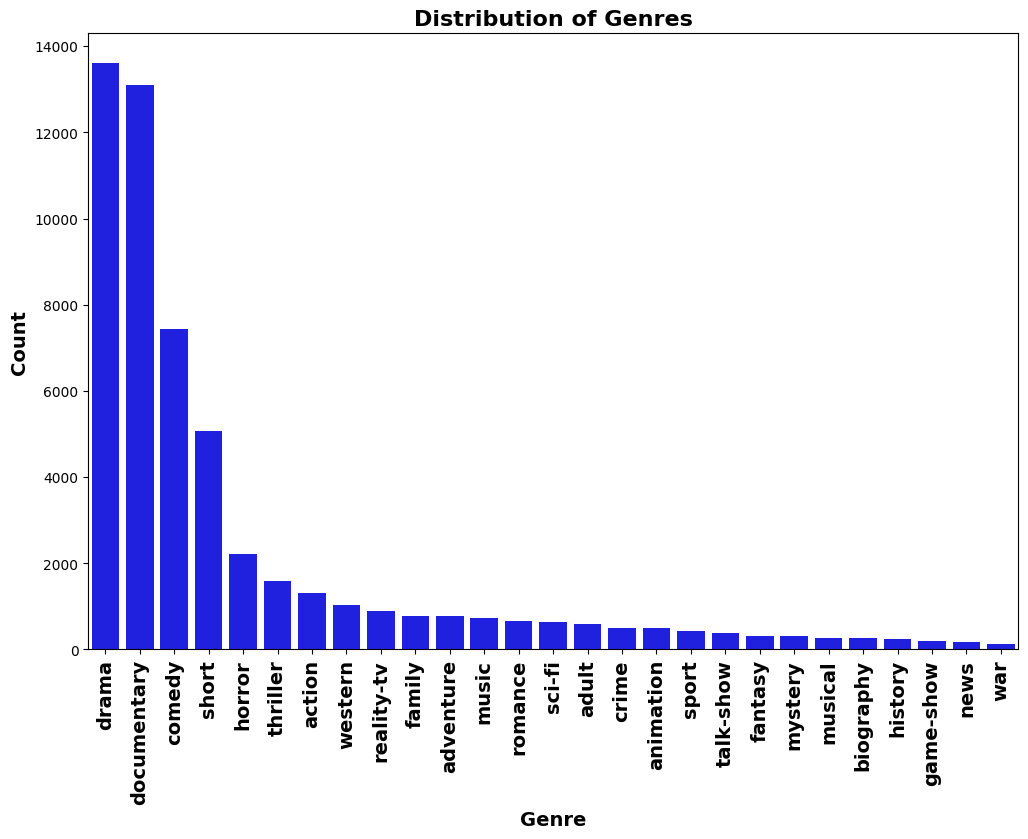

In [54]:
plt.figure(figsize=(12,8))
counts = train_data.Genres.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')

C:\Users\Asus\AppData\Local\Temp\ipykernel_23048\3814327606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genres', order=train_data['Genres'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Genres')

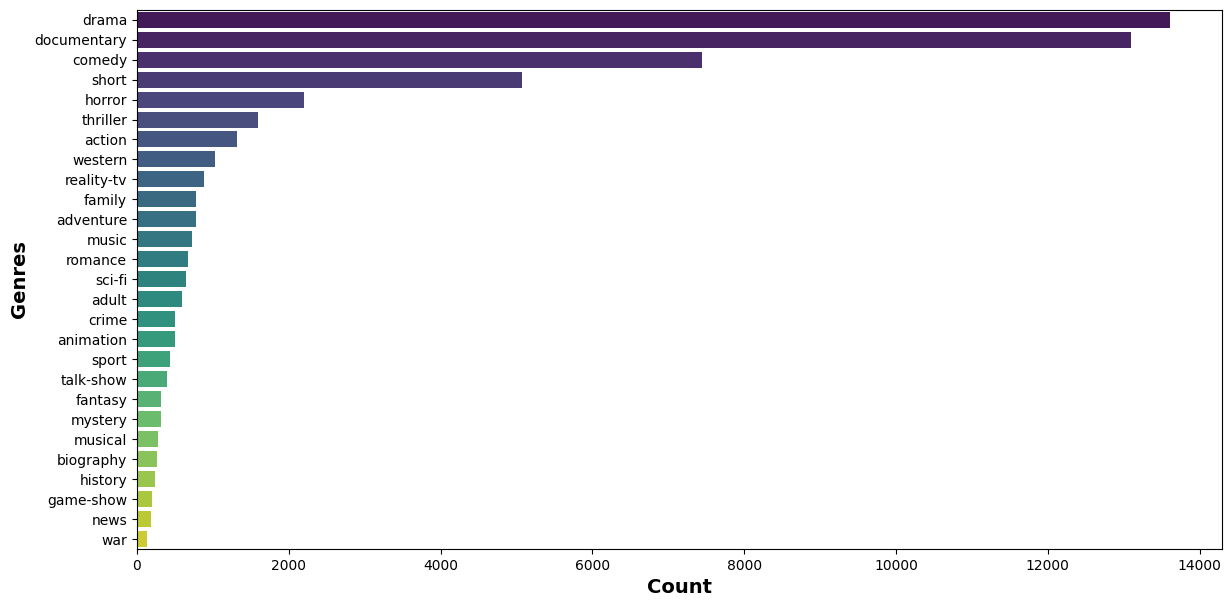

In [55]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genres', order=train_data['Genres'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genres', fontsize=14, fontweight='bold')

In [56]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
# Import necessary modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Import the necessary module
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
# import nltk
# nltk.download()
# # Set NLTK data path explicitly
# nltk.data.path.append("E:\\nltk_data")  # Replace "E:\\nltk_data" with the actual path to your NLTK data directory


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [57]:
test_path='D:\\intern\\codsoftintern\\Genre Classification Dataset\\test_data.txt'
test_Data=pd.read_csv(test_path,header=None,sep=" ::: ",names=['ID','Title','Description'],engine="python")
test_Data

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [58]:
test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [59]:
test_Data.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [63]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text


train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_Data['Text_cleaning'] = test_Data['Description'].apply(clean_text)

In [64]:
# Droping the redundant data
print("shape before drop nulls",train_data.shape)
train_data = train_data.drop_duplicates()
print("shape after drop nulls",train_data.shape)

shape before drop nulls (54214, 5)
shape after drop nulls (54214, 5)


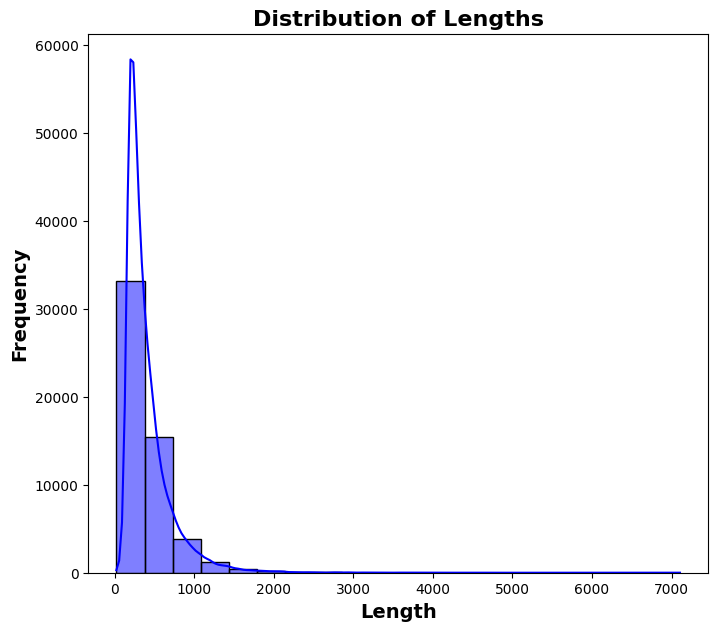

In [65]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

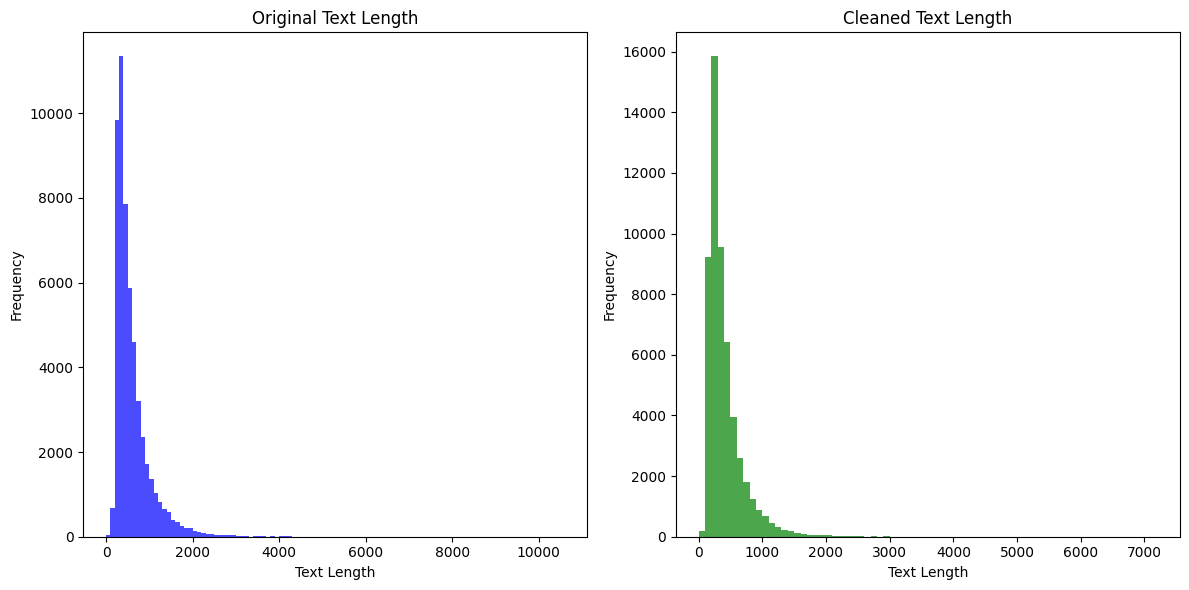

In [66]:
plt.figure(figsize=(12, 6))

# Subplot 1: Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Subplot 2: Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [68]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_Data['Text_cleaning'])


In [70]:
X = X_train
y = train_data['Genres']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44526422576777647


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.61      0.04      0.07      1443
       crime       0.00      0.00      0.00       107
 documentary       0.54      0.90      0.67      2659
       drama       0.38      0.88      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
X_test_predictions = classifier.predict(X_test)
test_Data['Predicted_Genre'] = X_test_predictions

In [72]:
test_Data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_Data)

          ID                           Title  \
0          1            Edgar's Lunch (1998)   
1          2        La guerra de papá (1977)   
2          3     Off the Beaten Track (2010)   
3          4          Meu Amigo Hindu (2015)   
4          5               Er nu zhai (1955)   
...      ...                             ...   
54195  54196  "Tales of Light & Dark" (2013)   
54196  54197     Der letzte Mohikaner (1965)   
54197  54198             Oliver Twink (2007)   
54198  54199               Slipstream (1973)   
54199  54200       Curitiba Zero Grau (2010)   

                                             Description  \
0      L.R. Brane loves his life - his car, his apart...   
1      Spain, March 1964: Quico is a very naughty chi...   
2      One year in the life of Albin and his family o...   
3      His father has died, he hasn't spoken with his...   
4      Before he was known internationally as a marti...   
...                                                  ...   
541